In [1]:
from skimage import io as skio
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2hsv
import numpy as np
import platform
import tempfile
import os
from haze_functions import dark_channel, atmosphere_light, transmission
# necessite scikit-image 

In [2]:
im = skio.imread("haze_image/trees-1587301_1280.jpg")

darkchannel = dark_channel(im,15)

image_gray = np.mean(im, axis=2).astype(np.uint8)

lol = atmosphere_light(im, darkchannel, 0.001)

t = transmission(im, lol, 0.95, 15)
print(t)
t2 = transmission(im, lol, 0.90, 15)
print(t2)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


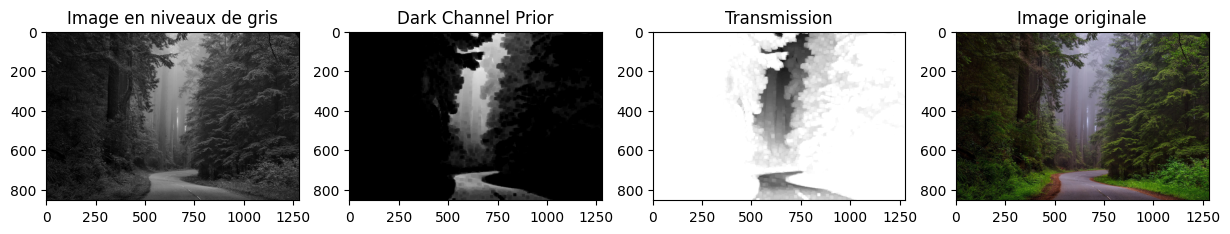

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(15, 15))

axes[0].imshow(image_gray, cmap='gray', )  # Utilisez 'gray' pour les images en niveaux de gris
axes[0].set_title('Image en niveaux de gris')

axes[1].imshow(darkchannel, cmap='gray')
axes[1].set_title('Dark Channel Prior')

axes[2].imshow(t, cmap='gray')
axes[2].set_title('Transmission')

axes[3].imshow(im)
axes[3].set_title('Image originale')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
(854, 1280, 3)
[[[0.09411765 0.0627451  0.01960784]
  [0.05098039 0.01568627 0.00392157]
  [0.04313725 0.00784314 0.00392157]
  ...
  [0.0627451  0.04313725 0.02745098]
  [0.05490196 0.03529412 0.01960784]
  [0.0745098  0.05490196 0.03921569]]

 [[0.11764706 0.09019608 0.05098039]
  [0.13333333 0.09803922 0.07058824]
  [0.05882353 0.02352941 0.00392157]
  ...
  [0.07058824 0.05098039 0.03529412]
  [0.0627451  0.04313725 0.02745098]
  [0.0745098  0.05490196 0.03921569]]

 [[

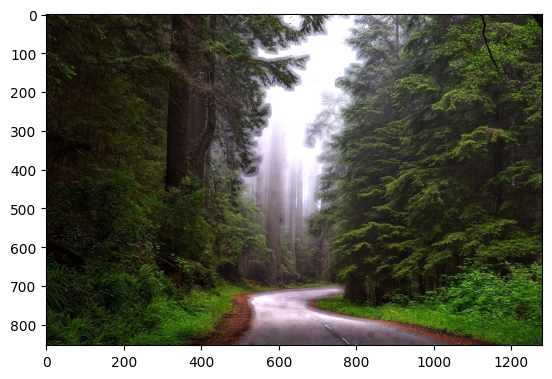

In [10]:
def haze_remove(im, A, t, t0):
    reshaped_t = t[:, :, np.newaxis].repeat(3, axis=2)
    print(reshaped_t)
    
    radiance= (im-A)/reshaped_t + A
    return (radiance-255)/255

final = haze_remove(im, lol, t, 0.2)
print(np.shape(final))
print(final)
plt.imshow(final)
plt.show()